In [1]:
# Import libraries
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np

### Add the layers (Encoder model)

In [23]:
encoding_dim = 32    # Compression ratio

# size 784 image down to size 32(compression ratio of 24.5)

In [24]:
input_img = keras.Input(shape=(784, ))  # This is our input placeholder

In [25]:
encoded = layers.Dense(encoding_dim, activation = "relu")(input_img)  # Encoded is the encoded representation of the input

In [26]:
decoded = layers.Dense(784, activation = "sigmoid")(encoded)   # Decoded is the "lossy" reconstruction of the input

In [27]:
autoencoder = keras.Model(input_img, decoded)   # This model maps an input to it's reconstruction

In [28]:
encoder = keras.Model(input_img, encoded)   # This model maps an input to it's encoded representation

### Create a separate decoder model for the output

In [29]:
encoded_input = keras.Input(shape = (encoding_dim, ))  # Create a placeholder for an encoded(32-Dimensional) input

In [30]:
decoder_layer = autoencoder.layers[-1]   # Retrieve the last layer of the encoded model

In [31]:
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))  # Create the decoder model

### Fine tune the model

In [32]:
autoencoder.compile(optimizer = "adam", loss = "binary_crossentropy")

In [33]:
# Train the data (This model doesn't require labels, so we just load (x) values)
(x_train,_),(x_test,_) = mnist.load_data()

In [34]:
x_train.shape

(60000, 28, 28)

In [35]:
x_test.shape

(10000, 28, 28)

### Normalize the data to a range of 0 to 1

In [36]:
x_train = x_train.astype("float32") / 255.

In [37]:
x_test = x_test.astype("float32") / 255.

### Reshape the 28x28 matrix to a vector of 784 values

In [38]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))

In [47]:
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [40]:
x_train.shape  # 60,000 images each with 784 pixels

(60000, 784)

In [41]:
x_test.shape  # 10,000 images each with 784 pixels

(10000, 784)

### Fitting the model

In [42]:
autoencoder.fit(x_train, x_train, epochs =50, batch_size = 256, shuffle = True, validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 4s 13ms/step - loss: 0.2759 - val_loss: 0.1911
Epoch 2/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1716 - val_loss: 0.1532
Epoch 3/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1436 - val_loss: 0.1329
Epoch 4/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1283 - val_loss: 0.1213
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1186 - val_loss: 0.1132
Epoch 6/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1117 - val_loss: 0.1077
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1067 - val_loss: 0.1032
Epoch 8/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1029 - val_loss: 0.1000
Epoch 9/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1001 - val_loss: 0.0976
Epoch 10/50
235/235 [==============================] - 3s 14ms/step - loss: 0.0981 - val_lo

In [43]:
# Reconstructing the images (Encoding and decodeng the images) Note: taken from test set
encoded_imgs = encoder.predict(x_test) # This is a smaller representation of the original images = encoding_dim
# Decoding and reconstructing the images
decoded_imgs = decoder.predict(encoded_imgs)

In [44]:
# Visualising the images
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
n = 10   # Number of images you want

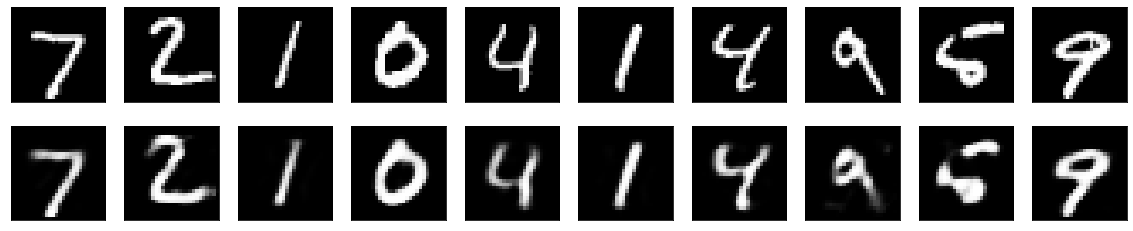

In [46]:
plt.figure(figsize = (20,4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28)) # Images from the x_test (original inmage)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)  # This code is the decoded images(input images from the decoding)
    
    # Plotting the reconstructed images(output images from the input images)
    ax  = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28)) # Output images from the decoding inputs
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()